In [46]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from geopandas import read_file
import xarray as xr
import rasterio

In [85]:

# Set up parameters
models = ["GAM"]
taxas = ["Mammals"]
model_names = ["GFDL-ESM2M", "IPSL-CM5A-LR", "HadGEM2-ES", "MIROC5"]
years = ["1845", "1990", "1995", "2009", "2010", "2020", "2026", "2032", "2048", "2050",
         "2052", "2056", "2080", "2100", "2150", "2200", "2250"]
time=[35]


for taxa in taxas:# Get all possible combinations of models and model_names    
    for model in models :
                
                
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + model + "/" +taxa+ "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]


        species_names = available_names[:10]


In [61]:

# Set up directory paths
dir_data = "/storage/scratch/users/ch21o450/data/LandClim_Output/"
dir_validation = "/storage/homefs/ch21o450/data/SpeciesData/"


In [87]:
mammals = read_file("/storage/homefs/ch21o450/data/MAMMALS.shp")

In [88]:
mammals

,id_no,binomial,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestial,freshwater,SHAPE_Leng,SHAPE_Area,geometry
0,7908,Epomops dobsonii,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,PTEROPODIDAE,Epomops,LC,false,true,false,58.763190,113.682144,"POLYGON ((35.15655 -8.95016, 34.16782 -9.52892..."
1,7908,Epomops dobsonii,6,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,PTEROPODIDAE,Epomops,LC,false,true,false,1.130118,0.050816,"MULTIPOLYGON (((32.91751 -4.97735, 32.91671 -4..."
2,16104,Paradoxurus jerdoni,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CARNIVORA,VIVERRIDAE,Paradoxurus,LC,false,true,false,45.734651,5.559232,"MULTIPOLYGON (((76.41078 10.61212, 76.41578 10..."
3,88149174,Lophostoma occidentalis,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,PHYLLOSTOMIDAE,Lophostoma,NT,false,true,false,40.333023,16.395889,"MULTIPOLYGON (((-80.15034 -5.44154, -80.38175 ..."
4,163314140,Microcebus boraha,1,1,1,IUCN,2020,IUCN (International Union for Conservation of ...,None,None,...,PRIMATES,CHEIROGALEIDAE,Microcebus,DD,false,true,false,1.279308,0.014417,"POLYGON ((50.01109 -16.70219, 50.01082 -16.703..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,17314,Pipistrellus kuhlii,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,VESPERTILIONIDAE,Pipistrellus,LC,false,true,false,10.242174,2.618374,"POLYGON ((15.61775 38.27410, 15.62328 38.27314..."
12887,17314,Pipistrellus kuhlii,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,VESPERTILIONIDAE,Pipistrellus,LC,false,true,false,1.325640,0.031093,"MULTIPOLYGON (((14.37888 35.98891, 14.35903 35..."
12888,17314,Pipistrellus kuhlii,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,VESPERTILIONIDAE,Pipistrellus,LC,false,true,false,2.062313,0.141882,"POLYGON ((28.23972 36.43475, 28.22980 36.40967..."
12889,17314,Pipistrellus kuhlii,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,VESPERTILIONIDAE,Pipistrellus,LC,false,true,false,0.666410,0.018499,"POLYGON ((-24.92866 16.91976, -24.92139 16.915..."


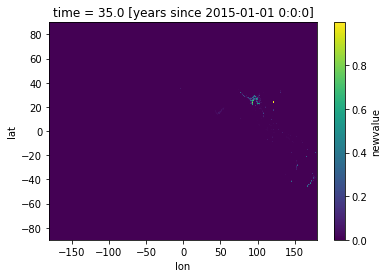

In [69]:
sd_model_data.plot()

In [86]:
auc_scores=[]

for species_name in species_names:
    print("Processing species:", species_name)
    
    # Load species distribution model output
    sd_model_file = dir_data + models[0] + "/" + taxas[0] + "/" + model_names[0] + "/rcp26/" + species_name + "_[35].nc"
    sd_model_data = xr.open_dataset(sd_model_file, decode_times=False)
    sd_model_data = sd_model_data.isel(time=0)
    sd_model_data = sd_model_data['sum_bin']  # Select the 'sum_bin' variable
    
    
    # Convert probability of occurrence to binary presence/absence data using a threshold value
    threshold = 0.05
    sd_model_binary = np.where(sd_model_data > threshold, 1, 0)
        # Find the correct validation file based on available names
    validation_file = [f for f in os.listdir(dir_validation) if species_name in f][0]
    validation_file_path = os.path.join(dir_validation, validation_file)
    
    # Read the validation data from the TIFF file using rasterio
    with rasterio.open(validation_file_path) as src:
        validation_data = src.read(1)

    # Flatten the validation data array and extract only the non-null values
    validation_points_binary = np.where(validation_points_masked > 0, 1, 0)

    # Flatten the model data array and extract only the corresponding non-null values
    model_points_masked = sd_model_binary.flatten()


    unique_values = np.unique(validation_points_masked)
    auc_score = roc_auc_score(validation_points_binary, model_points_masked)
    
        # Print the AUC score
    #print("AUC score for species", species_name, ":", auc_score)
    auc_scores.append(auc_score)
average_auc = np.mean(auc_scores)
print(average_auc)

Processing species: Harpiola_isodon
Processing species: Mus_phillipsi
Processing species: Perodicticus_ibeanus
Processing species: Microtus_oregoni
Processing species: Nelsonia_neotomodon
Processing species: Eonycteris_major
Processing species: Megaerops_ecaudatus
Processing species: Myotis_emarginatus
Processing species: Tragelaphus_imberbis
Processing species: Corynorhinus_rafinesquii
0.5458817038777456
